# Computer Assignment 3

Negar Moradi 810198543

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from __future__ import unicode_literals
from hazm import *
from copy import deepcopy
import csv
import codecs
import math 
import operator

### Reading data

In [2]:
divar_train = pd.read_csv("divar_train.csv")
test_train = pd.read_csv("divar_test.csv")
divar_train
stop_words_s = stop_file = codecs.open('stop-words.txt', encoding='utf-8')

### Preproccesing

In [3]:
global Tokens
Tokens = []

ignore = ['.', '!', '،', '?', 'سالم','قیمت','نو']

def merge(data):
    data['data'] = data['title'] + " " + data['description']
    return data

def Normalize(data):
    normalizer = Normalizer()
    data['data'] = data.apply(lambda row: normalizer.normalize(row ['data']), axis = 1)
    return data

def Tokenize(data):   
    data['data'] = data.apply(lambda row: word_tokenize(row['data']), axis = 1)
    return data

def Stemming(data):
    stemmer = Stemmer()
    data['data'] = data.apply(lambda row: [stemmer.stem(word) for word in row['data']], axis = 1)
    return data

def Lemmatization(data):
    lemmatizer = Lemmatizer()
    data['data'] = data.apply(lambda row: [lemmatizer.lemmatize(word) for word in row['data']], axis = 1)
    return data

def remove_stopwords(data):
    stopwords = stopwords_list()
    data['data'] = data.apply(lambda row: [word for word in row['data'] if word not in stopwords], axis = 1)
    data['data'] = data.apply(lambda row: [word for word in row['data'] if word not in ignore], axis = 1)
    data['data'] = data.apply(lambda row: [word for word in row['data'] if word not in stop_words_s], axis = 1)
    return data

def preproccesing(data):
    tdata = deepcopy(data)
    tdata = merge(tdata)
    tdata = Normalize(tdata)
 #   Tokens = Tokenize(tdata)
    tdata = Tokenize(tdata)
    tdata = Lemmatization(tdata)
    tdata = remove_stopwords(tdata)
    
    return tdata

In the preprocessing section, we do a few things: <br>

1: $ \textbf{Normalize} \to $ This function replace space with half-space. <br>
2: $ \textbf{Remove stop_words} \to $ we remove stop_words from data. (stop_word are words that are so commonly used that they carry very little useful information.) <br>
3: $ \textbf{Tokenzine} \to $ This function breaks a text into a list of it's words. <br>

$ \textbf{Stemming and Lemmatization}: $ <br>
1: $\textbf{Stemming} \to $ Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language. Infact it creates the base of a word, may be wrong some times. <br>
for example: بهتر $ \to $ بهترین <br>
2: $\textbf{Lemmatization} \to $ Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word. Infact Lemmatization works on verbs and returns the base form of a verb.<br>
for example: $می خوردم $ and $می خورم $ $ \to $ خور#خورد <br>

### Q1:
Besides what we said above we can say that stemming usually removes the suffix and prefix from a word.By stemming words, we can standardize them as word roots or base states. However, it does not work accurately here. for example it changes the word $ آسان $ to $ آس $. <br>
Lemmatization does the same and also returns the root and base of the word ,verb or a adjective. It is a more grammer related task. Lemmatization is the process of finding a word with a meaning (in the dictionary), which is really "Bon" or "root". Using this method is more accurate. <br>

In [4]:
stemmer = Stemmer()
print(stemmer.stem('آسان'))

آس


## Procces
### Q2:

$ x \to $ words
and c $\to $categories. <br>
$ \textbf{evidence}:$ our evidence is count of each word repeated in an ad (feature).$ \to P(word)$ (we have n word $\to$ word i) <br>
$ \textbf{likelihood}: P(word|categories) \to $ Probability of seeing a word by knowing its categories class. <br>
$$P(word|categories) = \dfrac{number\_of\_word i\_in\_categoties}{number\_of\_all\_words\_in\_categories}$$ <br>
$ \textbf{prior}: P(categories) \to $ The probability of an ad to be classified as categories c.  <br>
$$P(categories) = \dfrac{number\_of\_categories i\_ads}{all\_ads}$$ <br>
$ \textbf{posterior}: P(categories|word) \to $ The probability to classify an ad as categories c with observing a word t as evidence. <br>
$$P(categories|word) = \dfrac{P(word|categories) * P(categories)}{P(word)}$$




## Biagrams
### Q3:

for example: <br>
1) اسنپ فود به همراه غذا سس سیر نفرستاده بود <br>
2) پس از اینکه غذا خوردم و سیر شدم خوابیدم <br>
In the above sentences, سیر has a different meaning. for example in first sentence سیر means garlic. But in the second sentence, it means full. Using bigrams could increase accuracy. Here, سس و سیر can be considered as a token. <br>
In our sentences, using biagram was sufficient, although there are other examples in which nbiagram is more accurate. <br>

## Additive Smoothing

### Q4:
When a word does not exist in a category, the probability of the category's class will be zero, therefore, test data will be classified in a different category class because of the one word no matter what other words are. <br>
We use additive smoothing to solve the above problem.  

### Q5:

In statistics, additive smoothing, also called Laplace smoothing(not to be confused with Laplacian smoothing as used in image processing), or Lidstone smoothing, is a technique used to smooth categorical data. <br>
Laplace smoothing or additive smoothing is a smoothing technique that helps tackle the problem of zero probability in the Naïve Bayes machine learning algorithm. Using higher alpha values will push the likelihood towards a value of 0.5, i.e., the probability of a word equal to 0.5 for both the positive and negative reviews. <br>


$$ \dfrac{number\_of\_word\_w\_in\_class\_c + \alpha}{number\_of\_all\_words\_in\_class\_c + |v| +\alpha } $$ <br>

we use $\alpha = 1$. <br>
    
when a word is not in the train list, its probability will not be zero as its count is now 1 and when we see it again we will increase it so it is not zero any more and the problem is solved.

In [5]:
from collections import Counter
vehicles = 0
vehicles_dict = dict()
leisure_hobbies = 0
leisure_hobbies_dict = dict()
for_the_home = 0
for_the_home_dict = dict()
personal = 0
personal_dict = dict()
electronic_devices = 0
electronic_devices_dict = dict()
businesses = 0
businesses_dict = dict()

tdata = preproccesing(divar_train)

cat_indx = tdata.columns.get_loc("categories")
datas_indx = tdata.columns.get_loc("data")
for line in tdata.values:
    if line[cat_indx] == 'leisure-hobbies':
        for word in line[datas_indx]:
            if word in leisure_hobbies_dict.keys():
                leisure_hobbies_dict[word] += 1
            else:
                leisure_hobbies_dict[word] = 1
            leisure_hobbies += 1
    elif line[cat_indx] == 'vehicles':
        for word in line[datas_indx]:
            if word in vehicles_dict.keys():
                vehicles_dict[word] += 1
            else:
                vehicles_dict[word] = 1
            vehicles += 1
    elif line[cat_indx] == 'for-the-home':
        for word in line[datas_indx]:
            if word in for_the_home_dict.keys():
                for_the_home_dict[word] += 1
            else:
                for_the_home_dict[word] = 1
            for_the_home += 1
    elif line[cat_indx] == 'personal':
        for word in line[datas_indx]:
            if word in personal_dict.keys():
                personal_dict[word] += 1
            else:
                personal_dict[word] = 1
            personal += 1
    if line[cat_indx] == 'electronic-devices':
        for word in line[datas_indx]:
            if word in electronic_devices_dict.keys():
                electronic_devices_dict[word] += 1
            else:
                electronic_devices_dict[word] = 1
            electronic_devices += 1
    if line[cat_indx] == 'businesses':
        for word in line[datas_indx]:
            if word in businesses_dict.keys():
                businesses_dict[word] += 1
            else:
                businesses_dict[word] = 1
            businesses += 1

Text(0, 0.5, 'Number of words')

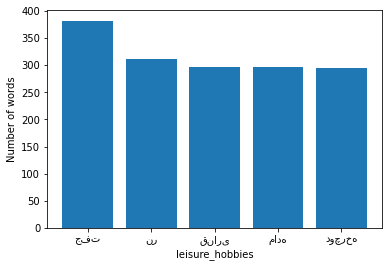

In [6]:
sorte = dict(sorted(leisure_hobbies_dict.items(),key=operator.itemgetter(1), reverse = True)[:5])
plt.bar(sorte.keys(), sorte.values())
plt.xlabel("leisure_hobbies")
plt.ylabel("Number of words")


Text(0, 0.5, 'Number of words')

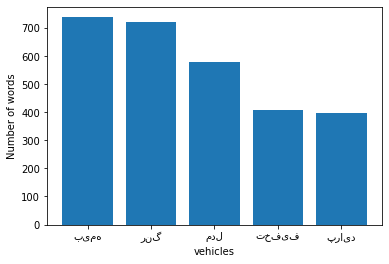

In [7]:

sorte = dict(sorted(vehicles_dict.items(),key=operator.itemgetter(1), reverse = True)[:5])
plt.bar(sorte.keys(), sorte.values())
plt.xlabel("vehicles")
plt.ylabel("Number of words")


Text(0, 0.5, 'Number of words')

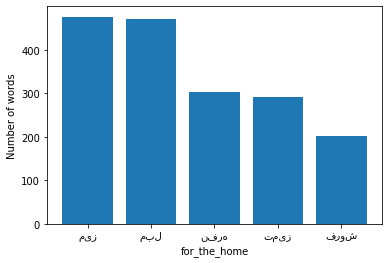

In [8]:

sorte = dict(sorted(for_the_home_dict.items(),key=operator.itemgetter(1), reverse = True)[:5])
plt.bar(sorte.keys(), sorte.values())
plt.xlabel("for_the_home")
plt.ylabel("Number of words")


Text(0, 0.5, 'Number of words')

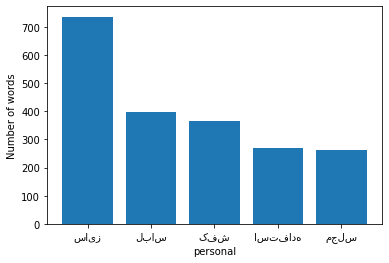

In [9]:

sorte = dict(sorted(personal_dict.items(),key=operator.itemgetter(1), reverse = True)[:5])
plt.bar(sorte.keys(), sorte.values())
plt.xlabel("personal")
plt.ylabel("Number of words")


Text(0, 0.5, 'Number of words')

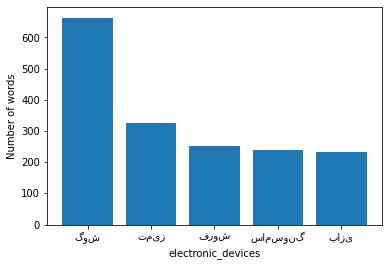

In [10]:

sorte = dict(sorted(electronic_devices_dict.items(),key=operator.itemgetter(1), reverse = True)[:5])
plt.bar(sorte.keys(), sorte.values())
plt.xlabel("electronic_devices")
plt.ylabel("Number of words")


Text(0, 0.5, 'Number of words')

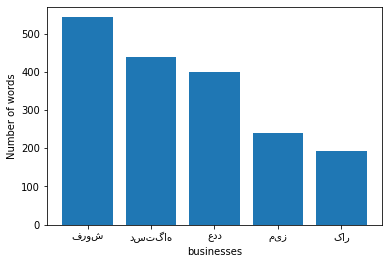

In [11]:


sorte = dict(sorted(businesses_dict.items(),key=operator.itemgetter(1), reverse = True)[:5])
plt.bar(sorte.keys(), sorte.values())
plt.xlabel("businesses")
plt.ylabel("Number of words")

In [12]:
   
categories =  ["leisure-hobbies", "vehicles", "for-the-home", "personal", "electronic-devices", "businesses"]     
categoriesd = {"leisure-hobbies":0, "vehicles":1, "for-the-home":2, "personal":3, "electronic-devices":4, "businesses":5}     
testdata = preproccesing(test_train)
leisure_hobbies_d = (len(list(leisure_hobbies_dict.keys())))
for_the_home_d = len(list(for_the_home_dict.keys()))
personal_d = len(list(personal_dict.keys()))
electronic_devices_d = len(list(electronic_devices_dict.keys()))
businesses_d = (len(list(businesses_dict.keys())))
vehicles_d = (len(list(businesses_dict.keys())))

wrongs = []
  
ZERO = 10**(-32)
nCorrect = 0
correctd = [0, 0, 0, 0, 0, 0]
alldetec = [0, 0, 0, 0, 0, 0]
nad = [0, 0, 0, 0, 0, 0]

def Accuracy():
    all_cat = len(testdata)
    return nCorrect/all_cat

def Precision(catei):
    return correctd[catei]/alldetec[catei]

def Recall(catei):
    return correctd[catei]/(nad[catei]+correctd[catei])

def F1(prc, rec):
    return (2 * prc * rec) / (prc + rec)
  

    

In [13]:
def Naive_bayes(alpha):
    global nCorrect
    for line in testdata.values:
        priror = [0, 0, 0, 0, 0, 0,]
        for word in line[datas_indx]:
            
            cul = categories.index("leisure-hobbies")
            if word not in leisure_hobbies_dict.keys():
                priror[cul] += math.log((ZERO + alpha)/(leisure_hobbies + alpha + leisure_hobbies_d))
            else:
                priror[cul] += math.log((leisure_hobbies_dict[word] + alpha)/(leisure_hobbies + alpha + leisure_hobbies_d))
            
            cul = categories.index("vehicles")
            if word not in vehicles_dict.keys():
                priror[cul] += math.log((ZERO + alpha)/(vehicles + alpha+vehicles_d))
            else:
                priror[cul] += math.log((vehicles_dict[word]+ alpha)/(vehicles + alpha+vehicles_d))
            cul = categories.index("for-the-home")
            if word not in for_the_home_dict.keys():
                priror[cul] += math.log((ZERO + alpha)/(for_the_home + alpha+for_the_home_d))
            else:
                priror[cul] += math.log((for_the_home_dict[word] + alpha)/(for_the_home + alpha+for_the_home_d))
            
            cul = categories.index("personal")
            if word not in personal_dict.keys():
                priror[cul] += math.log((ZERO + alpha)/(personal + alpha+personal_d))
            else:
                priror[cul] += math.log((personal_dict[word] + alpha)/(personal + alpha+personal_d))
            
            cul = categories.index("electronic-devices")
            if word not in electronic_devices_dict.keys():
                priror[cul] += math.log((ZERO + alpha)/(electronic_devices + alpha+electronic_devices_d))
            else:
                priror[cul] += math.log((electronic_devices_dict[word]+alpha)/(electronic_devices + alpha+electronic_devices_d))
            
            cul = categories.index("businesses")
            if word not in businesses_dict.keys():
                priror[cul] += math.log((ZERO + alpha)/(businesses + alpha+businesses_d))
            else:
                priror[cul] += math.log((businesses_dict[word]+alpha)/(businesses + alpha+businesses_d))
            
        predicp = max(priror)
        
        pcatindx = priror.index(predicp)
        pcat = categories[pcatindx]
        cate = line[cat_indx]
        cateindx = categoriesd[cate]
        
        alldetec[pcatindx] += 1
        if cate == pcat:
            nCorrect += 1
            correctd[pcatindx] += 1
        else:
            nad[cateindx] += 1
            wrongs.append(line)
            

   
            
    

In [14]:

sumF1 = []
weighteds = 0

cat_size = [leisure_hobbies, vehicles, for_the_home, personal, electronic_devices, businesses]

def print_result():
    
    global sumF1
    global weighteds
    sumF1.clear()
    weighteds = 0
    print("Accuracy: " + str(Accuracy()*100) +"%")
    print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
    for cat in categories:
        prcs = Precision(categories.index(cat))
        recl = Recall(categories.index(cat))
        cF1 = F1(prcs, recl)
        print("for ", cat)
        print("Precision: " + str(prcs*100) +"%")
        print("Recall: " + str(recl*100) +"%")
        print("F1: " + str(cF1*100) +"%")
        print("****************************************************")
        weighteds += cF1* cat_size[categories.index(cat)];
        sumF1.append(cF1)
    
    print("Micro avg: ", (nCorrect/sum(alldetec)*100), "%" )
    print("Macro avg: ", (sum(sumF1)/len(categories)*100) , "%")
    print("Weighted avg: ", (weighteds/sum(cat_size)*100), "%")
    print("------------------------------------------------------")
  
def Cal():
    global nCorrect
    global correctd
    global alldetec
    global nad

    print("Results without additive smoothing")
    Naive_bayes(0)
    print_result()
    correctd = [0, 0, 0, 0, 0, 0]
    alldetec = [0, 0, 0, 0, 0, 0]
    nad = [0, 0, 0, 0, 0, 0]
    nCorrect = 0
    print("Results with additive smoothing")
    Naive_bayes(1)
    print_result()
      
            
            
Cal()
          

Results without additive smoothing
Accuracy: 83.0%
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
for  leisure-hobbies
Precision: 86.21908127208481%
Recall: 81.33333333333333%
F1: 83.704974271012%
****************************************************
for  vehicles
Precision: 89.63210702341136%
Recall: 89.33333333333333%
F1: 89.48247078464107%
****************************************************
for  for-the-home
Precision: 80.82191780821918%
Recall: 78.66666666666666%
F1: 79.72972972972971%
****************************************************
for  personal
Precision: 86.20689655172413%
Recall: 83.33333333333334%
F1: 84.7457627118644%
****************************************************
for  electronic-devices
Precision: 87.33333333333333%
Recall: 87.33333333333333%
F1: 87.33333333333333%
****************************************************
for  businesses
Precision: 69.64285714285714%
Recall: 78.0%
F1: 73.58490566037736%
****************************************************
Micro avg:  83.0 %
M

## Q7


#### Precision:
When our model detects only a few classes for an ad, and if the model detects them correctly, its precision would be 100%, which is obviously not good.

#### Recall:
The recall value would be 100% if all ads were classified as one class, such as "personal," but we know our model misdetects many other ads and it is not as good.

## Q8

A F1 score is the harmonic mean of the precision and recall.The harmonic mean helps to find multiplicative or divisor relationships between fractions. The biggest F-score possible is 1, which indicates perfect precision and recall, and the smallest is 0, indicating zero precision or recall. F1 combines recall and precision, so it's a better score to measure our model predictions. <br>
A model with a recall of 100% and a precision of 0% gets a low score using this mean method.   <br>
By using the normal mean equation, we will get a value that is higher, and it is not a good metric, since we don't want both precision and recall to be higher than a certain threshold.  <br>

$$F1-score = 2 × (precision × recall)/(precision + recall)$$

## Q9

#### Macro:

an arithmetic mean of the per-class F1-scores. This is called the macro-averaged F1-score, or the macro-F1 for short, and is computed as a simple arithmetic mean of our per-class F1-scores. <br>
When averaging the macro-F1, we gave equal weights to each class. We don’t have to do that: in weighted-average F1-score, or weighted-F1, we weight the F1-score of each class by the number of samples from that class. 

$$ Macro_{F1} = \dfrac{correct\_detected}{all\_detected} $$

#### Micro:

The last variant is the micro-averaged F1-score, or the micro-F1. To calculate the micro-F1, we first compute micro-averaged precision and micro-averaged recall over all the samples , and then combine the two. How do we “micro-average”? We simply look at all the samples together. <br>

$$ Micro_{F1} = \dfrac{Sum_{F_n}}{n} $$


#### Weighted
Based on the proportion for each label in the dataset, weighted F1 calculates the average for each label.  

$$ Weighted_{F1} = \dfrac{Sum(F_n * cat\_size)}{sum(cat\_size} $$

## Q11

You can see that Additive Smoothing can significantly improve the performance of F1.  

In [15]:
wrongs_datframe = pd.DataFrame(wrongs, columns = ["title", "description", "categories", "data"])[105:110]
wrongs_datframe

,title,description,categories,data
105,تی شرت-طرح دار,نو\nبرندراک ای تیز\nایکس لارج,personal,"[تی, شرت-طرح, برندراک, ای, تیز, ایکس, لارج]"
106,پوشال زیر حیوانات,پوشال . رنده چوب برای زیر حیوانات / همستر ...خ...,leisure-hobbies,"[پوشال, حیوانات, پوشال, رنده, چوب, حیوانات, /,..."
107,ویترین چرخان چهارطبقه,تماس از ساعت ۹صبح تا ۷ شب بجز روزهای تعطیل,businesses,"[ویترین, چرخان, چهارطبقه, تماس, ساعت, ۹صبح, ۷,..."
108,دیکیسیتی در حد,تردمیل با توان استثنایی\nتحمل فقط تا 150 ک...,leisure-hobbies,"[دیکیسیتی, تردمیل, توان, استثنایی, تحمل, ۱۵۰, ..."
109,موتورسحر 150سی سی مدل ۱۳۹۵,موتورنو واکبند، سند برگ سفید،بیمه یکسال ،همراه...,vehicles,"[موتورسحر, ۱۵۰, مدل, ۱۳۹۵, موتورنو, واکبند, سن..."


The most errors were found in the (for-the-home and personal and electronic-devices) categories. As previously observed, most of the words in these categories were also found in other categories. A solution would be to add more words to Stop Words.